In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id"
)

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [7]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [16]:
# Reload the data into the DataFrame again
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id"
)

In [17]:
# Select the numeric columns to normalize
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
            'price_change_percentage_14d', 'price_change_percentage_30d',
            'price_change_percentage_60d', 'price_change_percentage_200d',
            'price_change_percentage_1y']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected numeric columns
scaled_data = scaler.fit_transform(df[num_cols])

# Create a new DataFrame with the scaled data and retain the original index
scaled_df = pd.DataFrame(scaled_data, columns=num_cols, index=df.index)

# Copy the coin_id column from the original DataFrame and set it as the index
scaled_df['coin_id'] = df.index
scaled_df.set_index('coin_id', inplace=True)

# Initalize and Fit the Scaler (if needed)
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols, index=df.index)

# Display the scaled DataFrame
df_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [18]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [51]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Loop through each possible k value from 1 to 11
for k in range(1, 12):
    # Create a KMeans model with n_clusters as k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data 
    kmeans.fit(df_scaled)
    
    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values for each k
print(inertia_values)


[630.8048780487804, 365.50658501755333, 301.54669540181976, 213.79732332543156, 154.27028813859405, 151.1804926185103, 73.77833149677627, 50.311580097369735, 39.22319613681713, 30.4842915900718, 25.818664858783052]


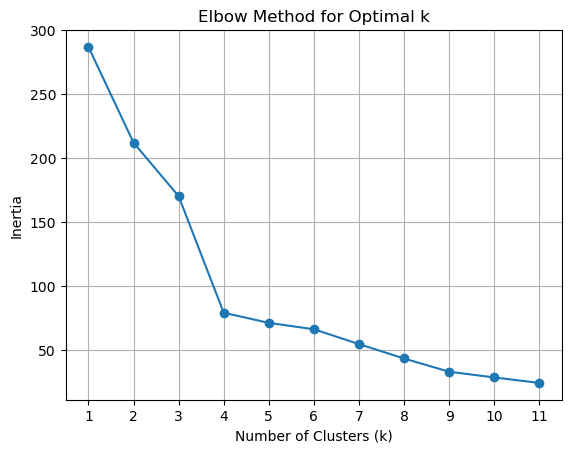

In [20]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {
    'k': list(range(1, 12)),  # k-values from 1 to 11
    'Inertia': inertia_values  # The inertia values from the previous step
}

# Step 2: Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)

# Step 3: Plot the Elbow curve using Matplotlib
plt.plot(elbow_df['k'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(elbow_df['k']) 
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [21]:
# Initialize the K-Means model using the best value for k
k = 4

In [22]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

KMeans(n_clusters=11, random_state=42)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
df_scaled['Cluster'] = kmeans.labels_

# Print the resulting array of cluster values.
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,6
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,4
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,6
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,6
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,6
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [24]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

# Display the first few rows of the copied DataFrame
df_scaled_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,6
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,4
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,6
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,6
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,6
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [25]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['Predicted_Cluster'] = kmeans.labels_

# Display the copy of the scaled DataFrame with the new column
df_scaled_copy.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster,Predicted_Cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,6,6
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,4,4
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,6,6
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,6,6
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,6,6
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0,0


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas  

# Create the scatter plot with K-means clusters colored
scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Predicted_Cluster",  # Color by K-means 
    cmap='Set1',  # Color map for clusters 
    hover_cols=["Predicted_Cluster", "coin_id"],  # Hover to show the cluster and crypto name
    title="Cryptocurrency Clusters by 24h and 7d Price Changes",
    size=10,  # Adjust the size of the points if necessary
    alpha=0.9  # Adjust the transparency of the points if necessary
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Predicted_Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.

pca_components = pca.fit_transform(df_scaled[num_cols])

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.index)


# View the scaled PCA data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [33]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.

# Retrieve the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [35]:
#Total explained variance of the three principal components
total_explained_variance = explained_variance.sum()
total_explained_variance

0.895031657030984

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:0.895031657030984

In [36]:
# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.index)

# Copy the coin_id column from the original scaled DataFrame (df_scaled)
pca_df['coin_id'] = df_scaled.index

# Set the coin_id column as the index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [37]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

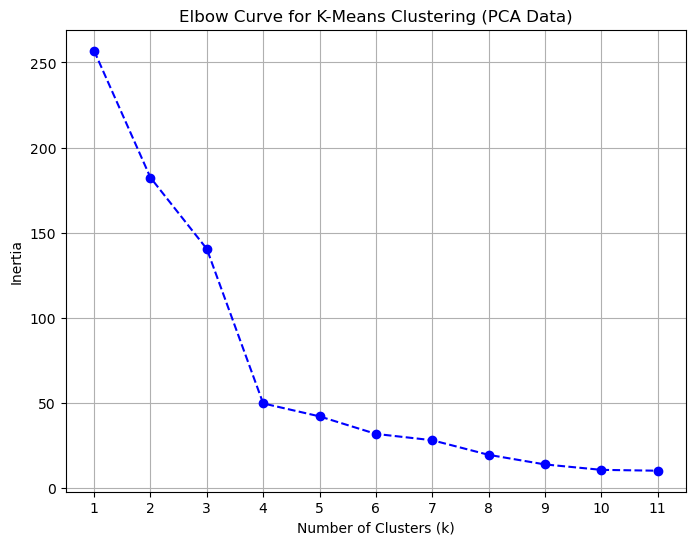

In [38]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])  
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve to visualize the best k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Curve for K-Means Clustering (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,  # The list of k-values
    'inertia': inertia_values  # The corresponding inertia values
}

# Create a DataFrame from the dictionary
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


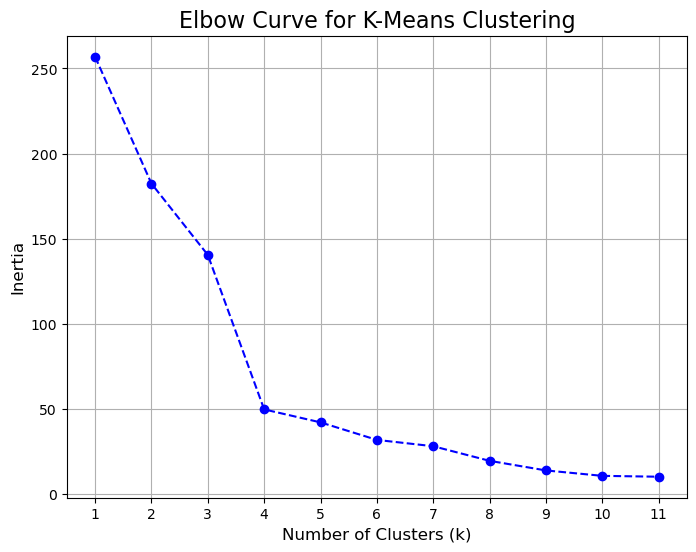

In [40]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='--', color='b')

# Title and labels
plt.title('Elbow Curve for K-Means Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Display grid and the plot
plt.grid(True)
plt.xticks(elbow_df['k'])  # Show k-values on the x-axis
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [41]:
# Initialize the K-Means model using the best value for k
best_k = 4

In [44]:
# Initialize the K-Means model with the best k value
kmeans_pca = KMeans(n_clusters=best_k, random_state=42)

# Fit the K-Means model using the PCA data (PCA1, PCA2, and PCA3)
kmeans_pca.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])

KMeans(n_clusters=4, random_state=42)

In [45]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predicted_clusters = kmeans_pca.predict(pca_df[['PCA1', 'PCA2', 'PCA3']])

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [46]:
# Create a copy of the scaled PCA DataFrame
pca_df_copy = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_copy['Predicted Cluster'] = predicted_clusters

# Display the copy of the scaled PCA DataFrame
pca_df_copy.head(10)

,PCA1,PCA2,PCA3,Predicted Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [47]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

# Create the scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    c="Predicted Cluster",  # Color by the predicted cluster
    cmap='viridis',  
    hover_cols=['coin_id'],  # Show cryptocurrency name when hovering
    title="Cryptocurrency Clusters in PCA Space",  # Title of the plot
    xlabel="PC1",  # Label for the x-axis
    ylabel="PC2",  # Label for the y-axis
    height=400,  # Height of the plot
    width=600   # Width of the plot
)

# Show the plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Predicted Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

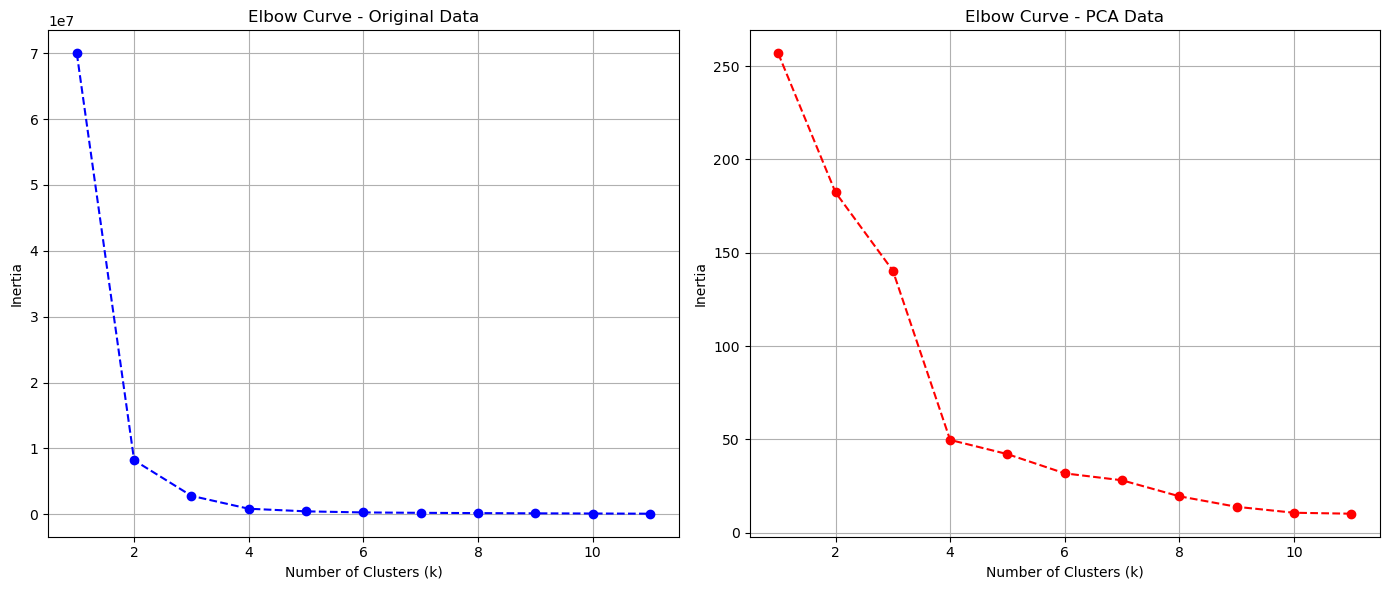

In [52]:
# Composite plot to contrast the Elbow curves
# Step 1: Create a list of k-values from 1 to 11
k_values = list(range(1, 12))

# Step 2: Compute inertia for the original data 
inertia_original = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[num_cols])  # Fit the KMeans model on the original data
    inertia_original.append(kmeans.inertia_)  # Append the inertia value for this k

# Step 3: Elbow Curve for the PCA data 
inertia_pca = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])  # Fit the KMeans model on the PCA-reduced data
    inertia_pca.append(kmeans.inertia_)

# Create a figure with two subplots (one for original data, one for PCA data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Elbow Curve for the original data
ax1.plot(k_values, inertia_original, marker='o', color='b', linestyle='--')
ax1.set_title('Elbow Curve - Original Data')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True)

# Elbow Curve for the PCA data
ax2.plot(k_values, inertia_pca, marker='o', color='r', linestyle='--')
ax2.set_title('Elbow Curve - PCA Data')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia')
ax2.grid(True)

# Show the composite plot
plt.tight_layout()
plt.show()

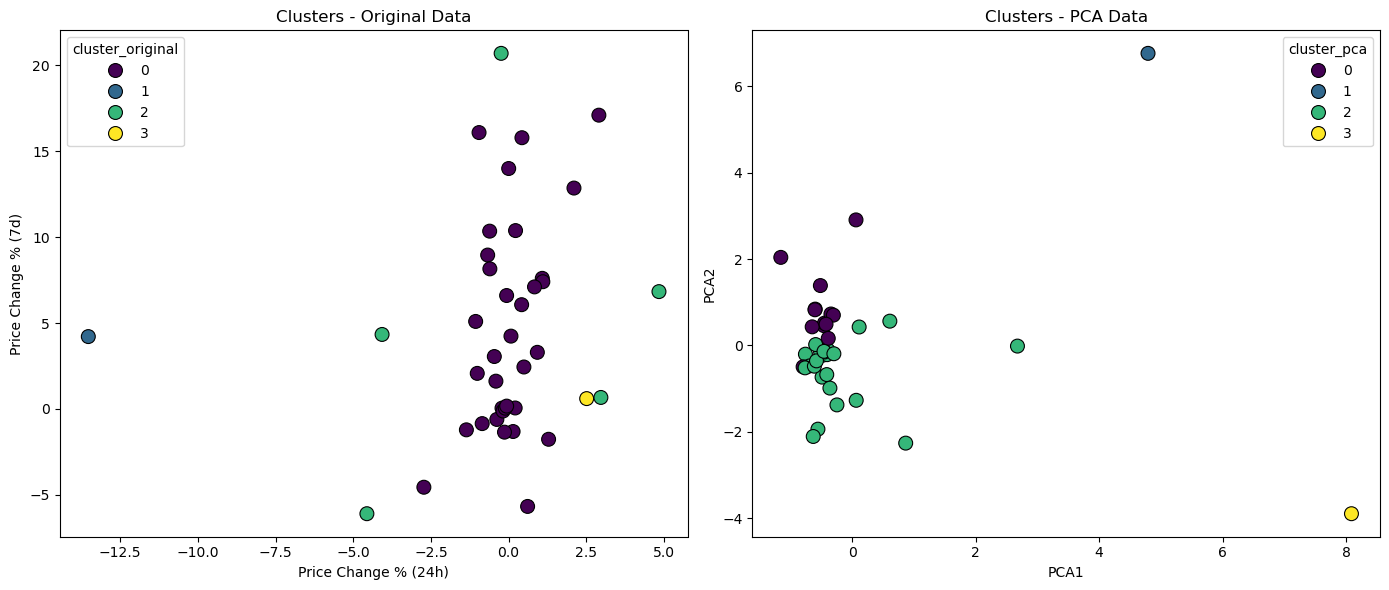

In [53]:
# Composite plot to contrast the clusters
k_best = 4  

# Fit KMeans to the original scaled data
kmeans_original = KMeans(n_clusters=k_best, random_state=42)
kmeans_original.fit(df[num_cols])

# Add the predicted clusters as a new column
df['cluster_original'] = kmeans_original.labels_

# Fit KMeans to the PCA-reduced data (using PCA1, PCA2, PCA3)
kmeans_pca = KMeans(n_clusters=k_best, random_state=42)
kmeans_pca.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])

# Add the predicted clusters as a new column
pca_df['cluster_pca'] = kmeans_pca.labels_

# Create a figure with two subplots to compare clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot clusters for the original data
sns.scatterplot(x='price_change_percentage_24h', 
                y='price_change_percentage_7d', 
                hue='cluster_original', 
                palette='viridis', 
                data=df, ax=ax1, s=100, edgecolor='black')
ax1.set_title('Clusters - Original Data')
ax1.set_xlabel('Price Change % (24h)')
ax1.set_ylabel('Price Change % (7d)')

# Plot clusters for the PCA data
sns.scatterplot(x='PCA1', 
                y='PCA2', 
                hue='cluster_pca', 
                palette='viridis', 
                data=pca_df, ax=ax2, s=100, edgecolor='black')
ax2.set_title('Clusters - PCA Data')
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')

# Show the composite plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Using fewer features for clustering through methods like PCA simplifies the data, making it easier to visualize and reducing computational complexity. While clustering with PCA may reveal clearer visual patterns, it may not capture all the nuances of the original features, potentially resulting in less meaningful clusters. The trade-off is between simplicity and interpretability versus preserving the full complexity of the data for more precise clustering.